# Broadband Access

**Notebook: 2-api-data**

## Abstract

**Purpose:** 
This notebook (intended for a technical audience) pursues acquisition of custom data via calls to the Census Bureau’s API, with the goal of comparing broadband Internet access across lower-level geographies and demographics.

**Acknowledgments:** 
Data source: U.S. Census Bureau, 2019 American Community Survey 1-Year Estimates (https://data.census.gov/cedsci/table?q=broadband&g=0400000US51.050000&y=2019&d=ACS%201-Year%20Estimates%20Data%20Profiles&tid=ACSDP1Y2019.DP02&hidePreview=false)


## Scope (notebook)

 - obtain API key
 - acquire custom api datasets
 - inspect and subset data
 - visualize statistics and data relationships

## Setup

In [1]:
# importing packages
import os
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# verifying the current working directory
os.getcwd()

'C:\\Users\\jamel\\myprojects\\acs-api\\notebooks'

In [4]:
# moving to the project's main directory
os.chdir('..')

# verifying the current working directory
os.getcwd()

'C:\\Users\\jamel\\myprojects\\acs-api'

In [5]:
# importing package to manage private key
from dotenv import load_dotenv

Within the "helpers" subdirectory is the `helpers_func` package, which includes the custom `save_pickle`/`read_pickle` serialization/de-serialization modules.

In [6]:
# importing the "helpers folder and contained modules as a package"
from helpers import *

In [7]:
# loading python's `autoreload`, to update any external module changes
%load_ext autoreload

# turning-on `autoreload`
%autoreload 2

### (de)Serialization

We will use the `pickle` serialization format to restore previously saved objects.

In [8]:
# printing object-restoration message
print("Result of restoration attempt:\n")

# restoring the data dictionary and broadband data list from the serialized file
metadata_dict = read_pickle("pickles/metadata-dict.pkl")
broadband_vars = read_pickle("pickles/broadband-vars.pkl")

Result of restoration attempt:

Object restored from pickles/metadata-dict.pkl
Object restored from pickles/broadband-vars.pkl


In [9]:
# verifying list restoration
broadband_vars

['DP02_0153E', 'DP02_0153M', 'DP02_0153PE', 'DP02_0153PM']

In [10]:
# verifying data dictionary restoration
metadata_dict

{'NAME': ['Geographic Area Name'],
 'DP02_0001E': ['Estimate!!HOUSEHOLDS BY TYPE!!Total households'],
 'DP02_0001M': ['Margin of Error!!HOUSEHOLDS BY TYPE!!Total households'],
 'DP02_0001PE': ['Percent!!HOUSEHOLDS BY TYPE!!Total households'],
 'DP02_0001PM': ['Percent Margin of Error!!HOUSEHOLDS BY TYPE!!Total households'],
 'DP02_0002E': ['Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family'],
 'DP02_0002M': ['Margin of Error!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family'],
 'DP02_0002PE': ['Percent!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family'],
 'DP02_0002PM': ['Percent Margin of Error!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family'],
 'DP02_0003E': ['Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family!!With own children of the householder under 18 years'],
 'DP02_0003M': ['Margin of Error!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family!!With own children of the householder under 18 years']

In [11]:
# # -----REFERENCE-----
# # serializing the data dictionary
# save_pickle(metadata_dict, "metadata-dict")

# # serializing the list of broadband variables
# save_pickle(broadband_geo_ids, "broadband-geo-ids")

## API

Here we test our API call for 5 rows of data without an authentication key.

In [12]:
# previewing data returned from an api call in pandas
pd.read_json("https://api.census.gov/data/2019/acs/acs1/profile?get=GEO_ID,NAME,DP02_0153E,DP02_0153M,DP02_0153PE,DP02_0153PM&for=county:*&in=state:51").head()

,0,1,2,3,4,5,6,7
0,GEO_ID,NAME,DP02_0153E,DP02_0153M,DP02_0153PE,DP02_0153PM,state,county
1,0500000US51095,"James City County, Virginia",27223,1677,90.0,3.5,51,095
2,0500000US51087,"Henrico County, Virginia",112672,2952,86.3,1.8,51,087
3,0500000US51177,"Spotsylvania County, Virginia",42465,1419,91.5,2.1,51,177
4,0500000US51121,"Montgomery County, Virginia",33056,1661,91.2,2.6,51,121


#### Environment Variable

Load environment variables from a local file, with the `dotenv` library.

In [13]:
# load saved key `CensusDataKey` from local file ".env"
print("Environment variables loaded.")
load_dotenv()

Environment variables loaded.


True

In [14]:
# instantiating the stored api key
key = os.environ.get("CensusDataKey")

This time, we combine a constructed api query and our authentication key to instantiate an authorized query call.

In [15]:
# instatiating the constructed api call
api_url = "https://api.census.gov/data/2019/acs/acs1/profile?get=GEO_ID,NAME,DP02_0153E,DP02_0153M,DP02_0153PE,DP02_0153PM&for=county:*&in=state:51"   

# appending the private key to the api URL
keyed_query = api_url + f"&key={key}"

In [16]:
# previewing the queried data
pd.read_json(keyed_query)

,0,1,2,3,4,5,6,7
0,GEO_ID,NAME,DP02_0153E,DP02_0153M,DP02_0153PE,DP02_0153PM,state,county
1,0500000US51095,"James City County, Virginia",27223,1677,90.0,3.5,51,095
2,0500000US51087,"Henrico County, Virginia",112672,2952,86.3,1.8,51,087
3,0500000US51177,"Spotsylvania County, Virginia",42465,1419,91.5,2.1,51,177
4,0500000US51121,"Montgomery County, Virginia",33056,1661,91.2,2.6,51,121
5,0500000US51107,"Loudoun County, Virginia",127625,2436,95.4,1.2,51,107
6,0500000US51153,"Prince William County, Virginia",137524,2159,95.8,0.8,51,153
7,0500000US51061,"Fauquier County, Virginia",21241,1293,87.5,3.0,51,061
8,0500000US51510,"Alexandria city, Virginia",65428,1931,92.1,1.6,51,510
9,0500000US51650,"Hampton city, Virginia",47767,1933,85.9,2.5,51,650


**Create a Function**

We want to return the data as a dataframe with ACS variables as column headers.

In [17]:
def api_json_to_df(keyed_query):
    ''' This function returns the JSON result of an 
        authenticated API query as a dataframe.    
    
    - INPUT:    keyed_query = formatted query string with key appended 
                <keyed_query = api_url + f"&key={key}">
    - OUTPUT:   a dataframe with column headers
                called with <"df = func>": 
    '''
    
    # instantiating the dataframe
    df = pd.read_json(keyed_query)

    # extracting column headers from first row values
    headers = df.iloc[0]

    # creating a new dataframe with extracted column headers
    ex_df  = pd.DataFrame(df.values[1:], columns=headers)

    # return the new dataframe
    return ex_df
 

In [18]:
# executing the function to acquire and instantiate data as a dataframe
api_df = api_json_to_df(keyed_query)

In [19]:
# verifying column headers
api_df.columns

Index(['GEO_ID', 'NAME', 'DP02_0153E', 'DP02_0153M', 'DP02_0153PE',
       'DP02_0153PM', 'state', 'county'],
      dtype='object', name=0)

In [20]:
# viewing the dataframe
api_df

,GEO_ID,NAME,DP02_0153E,DP02_0153M,DP02_0153PE,DP02_0153PM,state,county
0,0500000US51095,"James City County, Virginia",27223,1677,90.0,3.5,51,095
1,0500000US51087,"Henrico County, Virginia",112672,2952,86.3,1.8,51,087
2,0500000US51177,"Spotsylvania County, Virginia",42465,1419,91.5,2.1,51,177
3,0500000US51121,"Montgomery County, Virginia",33056,1661,91.2,2.6,51,121
4,0500000US51107,"Loudoun County, Virginia",127625,2436,95.4,1.2,51,107
5,0500000US51153,"Prince William County, Virginia",137524,2159,95.8,0.8,51,153
6,0500000US51061,"Fauquier County, Virginia",21241,1293,87.5,3.0,51,061
7,0500000US51510,"Alexandria city, Virginia",65428,1931,92.1,1.6,51,510
8,0500000US51650,"Hampton city, Virginia",47767,1933,85.9,2.5,51,650
9,0500000US51013,"Arlington County, Virginia",103460,2365,92.5,1.4,51,013


Our next step is to plan the data we want to analyze, identify the relevant variables, and request the data from the Census Data API.

# Obtain

Let's include estimates and margin of error data for an additional subcategory: data for for the households of single mothers with children under the age of 18.

We will update our URL with the relevant variables found in our data dictionary: DP02_0011E, DP02_0011M, DP02_0011PE, and DP02_0011PM.

In [21]:
# updating the api url
api_url = "https://api.census.gov/data/2019/acs/acs1/profile?get=GEO_ID,NAME,DP02_0153E,DP02_0153M,DP02_0153PE,DP02_0153PM,DP02_0011E,DP02_0011M,DP02_0011PE,DP02_0011PM&for=county:*&in=state:51"

We also need to 'recalculate' the value of `keyed_query` given the changed URL.

*Refactor note: We can avoid repeating this step by adding it to our function.*

In [22]:
# updating the keyed_query
keyed_query = api_url + f"&key={key}"

Now we run our function as we did previously and view the returned dataframe.

In [23]:
# executing the query
api_df = api_json_to_df(keyed_query)

# viewing the dataframe
api_df

,GEO_ID,NAME,DP02_0153E,DP02_0153M,DP02_0153PE,DP02_0153PM,DP02_0011E,DP02_0011M,DP02_0011PE,DP02_0011PM,state,county
0,0500000US51095,"James City County, Virginia",27223,1677,90.0,3.5,1413,609,4.7,2.0,51,095
1,0500000US51087,"Henrico County, Virginia",112672,2952,86.3,1.8,7829,1331,6.0,1.0,51,087
2,0500000US51177,"Spotsylvania County, Virginia",42465,1419,91.5,2.1,2339,907,5.0,2.0,51,177
3,0500000US51121,"Montgomery County, Virginia",33056,1661,91.2,2.6,1052,482,2.9,1.4,51,121
4,0500000US51107,"Loudoun County, Virginia",127625,2436,95.4,1.2,5180,1406,3.9,1.1,51,107
5,0500000US51153,"Prince William County, Virginia",137524,2159,95.8,0.8,7011,1707,4.9,1.2,51,153
6,0500000US51061,"Fauquier County, Virginia",21241,1293,87.5,3.0,649,350,2.7,1.4,51,061
7,0500000US51510,"Alexandria city, Virginia",65428,1931,92.1,1.6,2882,1022,4.1,1.4,51,510
8,0500000US51650,"Hampton city, Virginia",47767,1933,85.9,2.5,4039,1124,7.3,2.0,51,650
9,0500000US51013,"Arlington County, Virginia",103460,2365,92.5,1.4,2913,831,2.6,0.7,51,013


# Scrub 

Time for some data cleansing.

In [24]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
GEO_ID         30 non-null object
NAME           30 non-null object
DP02_0153E     30 non-null object
DP02_0153M     30 non-null object
DP02_0153PE    30 non-null object
DP02_0153PM    30 non-null object
DP02_0011E     30 non-null object
DP02_0011M     30 non-null object
DP02_0011PE    30 non-null object
DP02_0011PM    30 non-null object
state          30 non-null object
county         30 non-null object
dtypes: object(12)
memory usage: 2.9+ KB


All data columns are string objects. We should convert "E" and "M" columns to integers. The "PE" and "PM" columns represent percentages. We can convert them to floats.

This particular dataset is small enough to visibly see that none of the data in columns we need to convert are empty, and none of them contain values that cannot be converted to numeric data

Since we will use these functions again, let's add them to our "helpers" package.

In [25]:
# %%writefile -a C:\Users\jamel\myprojects\acs-api\helpers\helper_func.py


# def string_to_integer(df_cols):
#     """ Converts string type columns to integers
#     - INPUT:    dataframe column slice
#                 <df[["col"]]> for a single column, 
#                 or <df[list_cols]> for a list of columns.
#     - OUTPUT: converte columns
#     """
#     print( "Converting...................")
#     return df_cols.astype('int64')


# def string_to_float(df_cols):
#     """Converts string type columns to floats,
#         rounded to a single decimal place
#     - INPUT:    dataframe column slice
#                 <df[["col"]]> for a single column, 
#                 or <df[list_cols]> for a list of columns.
#     - OUTPUT:   None. Dataframe columns are converted to floats.
        
#     """
#     print( "Converting...................")
#     return df_cols.astype('float')

**Adding conversion functions to the "\_\_init_\_\.py" file**

In [26]:
# %%writefile -a C:\Users\jamel\myprojects\acs-api\helpers\__init__.py
    

# from .helper_func import string_to_integer
# from .helper_func import string_to_float

**Import the new modules**

In [27]:
# # these will import with "*" above when the notebook is re-run
# # importing conversion modules to the notebook from "helpers"
# from helpers import string_to_float,string_to_integer

### Convert columns.

In [28]:
# listing variables to convert to int/float
int_vars = ["DP02_0153E", "DP02_0153M", "DP02_0011E", "DP02_0011M"]
float_vars = ["DP02_0153PE", "DP02_0153PM", "DP02_0011PE", "DP02_0011PM"]

In [29]:
# viewing column data types
api_df[int_vars].dtypes

0
DP02_0153E    object
DP02_0153M    object
DP02_0011E    object
DP02_0011M    object
dtype: object

In [30]:
# converting to integers with function
api_df[int_vars] = string_to_integer(api_df[int_vars])

# viewing column data types
api_df[int_vars].dtypes

Converting...................


0
DP02_0153E    int64
DP02_0153M    int64
DP02_0011E    int64
DP02_0011M    int64
dtype: object

In [31]:
# viewing column data types
api_df[float_vars].dtypes

0
DP02_0153PE    object
DP02_0153PM    object
DP02_0011PE    object
DP02_0011PM    object
dtype: object

In [32]:
# converting to floats with function
api_df[float_vars] = string_to_float(api_df[float_vars])

# viewing column data types
api_df[float_vars].dtypes

Converting...................


0
DP02_0153PE    float64
DP02_0153PM    float64
DP02_0011PE    float64
DP02_0011PM    float64
dtype: object

In [33]:
# view dataframe info
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
GEO_ID         30 non-null object
NAME           30 non-null object
DP02_0153E     30 non-null int64
DP02_0153M     30 non-null int64
DP02_0153PE    30 non-null float64
DP02_0153PM    30 non-null float64
DP02_0011E     30 non-null int64
DP02_0011M     30 non-null int64
DP02_0011PE    30 non-null float64
DP02_0011PM    30 non-null float64
state          30 non-null object
county         30 non-null object
dtypes: float64(4), int64(4), object(4)
memory usage: 2.9+ KB


Let's align our column names to the `metadata_dict` labels.

In [34]:
# view column names
api_df.columns

Index(['GEO_ID', 'NAME', 'DP02_0153E', 'DP02_0153M', 'DP02_0153PE',
       'DP02_0153PM', 'DP02_0011E', 'DP02_0011M', 'DP02_0011PE', 'DP02_0011PM',
       'state', 'county'],
      dtype='object', name=0)

In [35]:
# rename columns by mapping `metadata_dict` labels to column headers
dict_df = api_df.rename(columns={'DP02_0153E': 'broadband_est', 'DP02_0153M': 'broadband_margin', 
                                 'DP02_0153PE': 'broadband_pct_est', 'DP02_0153PM': 'broadband_pct_margin', 
                                 'DP02_0011E': 'single_mother_est', 'DP02_0011M': 'single_mother_margin', 
                                 'DP02_0011PE': 'single_mother_pct_est', 'DP02_0011PM': 'single_mother_pct_margin'})
dict_df

,GEO_ID,NAME,broadband_est,broadband_margin,broadband_pct_est,broadband_pct_margin,single_mother_est,single_mother_margin,single_mother_pct_est,single_mother_pct_margin,state,county
0,0500000US51095,"James City County, Virginia",27223,1677,90.0,3.5,1413,609,4.7,2.0,51,095
1,0500000US51087,"Henrico County, Virginia",112672,2952,86.3,1.8,7829,1331,6.0,1.0,51,087
2,0500000US51177,"Spotsylvania County, Virginia",42465,1419,91.5,2.1,2339,907,5.0,2.0,51,177
3,0500000US51121,"Montgomery County, Virginia",33056,1661,91.2,2.6,1052,482,2.9,1.4,51,121
4,0500000US51107,"Loudoun County, Virginia",127625,2436,95.4,1.2,5180,1406,3.9,1.1,51,107
5,0500000US51153,"Prince William County, Virginia",137524,2159,95.8,0.8,7011,1707,4.9,1.2,51,153
6,0500000US51061,"Fauquier County, Virginia",21241,1293,87.5,3.0,649,350,2.7,1.4,51,061
7,0500000US51510,"Alexandria city, Virginia",65428,1931,92.1,1.6,2882,1022,4.1,1.4,51,510
8,0500000US51650,"Hampton city, Virginia",47767,1933,85.9,2.5,4039,1124,7.3,2.0,51,650
9,0500000US51013,"Arlington County, Virginia",103460,2365,92.5,1.4,2913,831,2.6,0.7,51,013


Now that the data types and labels are correct and clear, we can use the `describe()` function to view summary statistics for our dataset.

In [36]:
# viewing summary statistics
dict_df.describe()

,broadband_est,broadband_margin,broadband_pct_est,broadband_pct_margin,single_mother_est,single_mother_margin,single_mother_pct_est,single_mother_pct_margin
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,68712.100000,1974.400000,88.176667,2.443333,4051.766667,1018.333333,5.373333,1.706667
std,71228.221652,603.560847,4.974673,0.978276,3549.782147,465.802188,2.266690,0.630234
min,21241.000000,1098.000000,77.200000,0.600000,649.000000,350.000000,2.600000,0.600000
25%,27681.750000,1662.250000,85.725000,1.800000,1321.250000,636.000000,3.725000,1.400000
50%,40261.000000,1740.000000,87.600000,2.450000,2897.500000,952.000000,4.950000,1.550000
75%,77998.250000,2418.250000,91.950000,3.075000,6654.250000,1305.750000,6.350000,2.000000
max,382803.000000,3539.000000,95.800000,4.300000,15742.000000,2261.000000,10.400000,3.200000


Take a quick look at broadband and single-mother estimates.

In [101]:
# instantiating plotting variables
head_df = broadband_sm_df.head()
x = head_df['NAME']
y1 = head_df['broadband_pct_est']
y2 = head_df['single_mother_pct_est']

Create two plots in 1-column and 2-row.

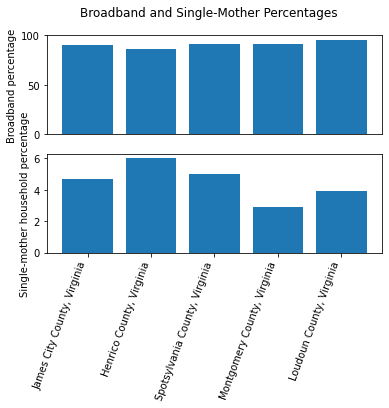

In [115]:
# creating the broadband plot
plt.subplot(2,1,1)
plt.ylabel('Broadband percentage')
plt.bar(x, y1)
plt.xticks([],[])

# creating the single-mothers plot
plt.subplot(2,1,2)
plt.bar(x, y2)
plt.ylabel('Single-mother household percentage')
plt.xticks(rotation=70, ha='right')

# titling and displaying
plt.suptitle("Broadband and Single-Mother Percentages")
plt.show()

Can we draw any meaningful conclusions, yet (other than, "that plot looks like a troubling dental exam" and, "there must be better ways to visualize data")?

Well, maybe not yet.

## Notebook Summary

This is a good place for us to pause.

We now have an authorization key for the U.S. Census Bureau's API, and we know how to acquire custom datasets related to the American Community Survey. We can serialize any local variables we wish to save for future use  

We will import an additional tools and explore data relationships more meaningfully in the [next notebook](../notebooks/3-explore.ipynb).

